In [30]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
movie_data = pd.read_csv('data/filtered_data.csv')

In [3]:
movie_data

,Unnamed: 0,id,title,vote_average,year,month,genre_ids,budget,revenue,runtime,...,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,Thriller,War,Western
0,0,539,Psycho,8.434,1960,6,"[27, 53, 9648]",806947.0,32000000.0,109,...,0,0,1,0,1,0,0,1,0,0
1,1,967,Spartacus,7.500,1960,10,"[36, 10752, 18, 12]",12000000.0,60000000.0,197,...,0,1,0,0,0,0,0,0,1,0
2,2,966,The Magnificent Seven,7.500,1960,10,"[37, 28, 12]",2000000.0,4905000.0,127,...,0,0,0,0,0,0,0,0,0,1
3,3,284,The Apartment,8.214,1960,6,"[35, 18, 10749]",3000000.0,25000000.0,125,...,0,0,0,0,0,1,0,0,0,0
4,4,439,La Dolce Vita,8.121,1960,2,"[35, 18]",NaN,19647000.0,176,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,6416,1026227,There's Still Tomorrow,8.295,2023,10,"[35, 18]",9000000.0,38825277.0,118,...,0,0,0,0,0,0,0,0,0,0
6417,6417,693134,Dune: Part Two,8.549,2024,2,"[28, 12, 878]",190000000.0,178000000.0,166,...,0,0,0,0,0,0,1,0,0,0
6418,6418,933131,Badland Hunters,6.800,2024,1,"[878, 28, 18]",NaN,NaN,107,...,0,0,0,0,0,0,1,0,0,0
6419,6419,866398,The Beekeeper,7.400,2024,1,"[28, 53, 18]",35000000.0,149645000.0,105,...,0,0,0,0,0,0,0,1,0,0


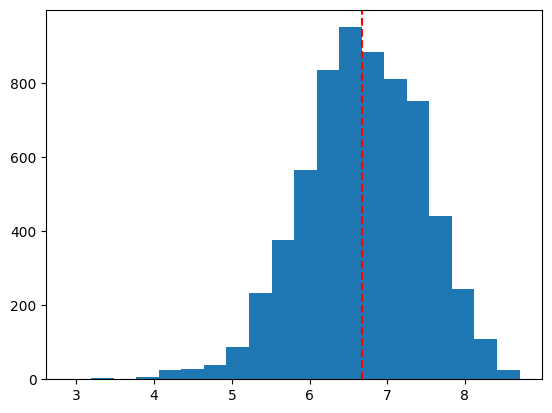

In [4]:
average_rating = np.mean(movie_data.vote_average)
_ = plt.hist(movie_data.vote_average, bins=20)
_ = plt.axvline(x=average_rating, color='r', linestyle='--')

The ratings of movies in the dataset resembles a normal distribution, but does have a longer tail on the lower-rated side.

To compare genres directly, it will be necessary to re-organize the data.

In [49]:
genre_dict = {'Action':28, 'Adventure':12, 'Animation':16, 'Comedy':35, 'Crime':80, 'Documentary':99,
              'Drama':18, 'Family':10751, 'Fantasy':14, 'History':36, 'Horror':27, 'Music':10402,
              'Mystery':9648, 'Romance':10749, 'Science_Fiction':878, 'Thriller':53,
              'War':10752, 'Western':37}
genre_col = {key: i + 11 for i, key in enumerate(genre_dict.keys())}

In [6]:
genre_columns = list(genre_dict.keys())

# Additional columns to include
additional_columns = ['id', 'vote_average', 'year', 'month', 'budget', 'revenue', 'runtime']

# Melt the DataFrame
long_format_df = pd.melt(movie_data, id_vars=additional_columns, value_vars=genre_columns, var_name='genre', value_name='presence')

# Filter out rows where the genre is not present
long_format_df = long_format_df[long_format_df['presence'] == 1]
long_format_df = long_format_df.drop(columns=['presence'])

long_format_df

,id,vote_average,year,month,budget,revenue,runtime,genre
2,966,7.500,1960,10,2000000.0,4905000.0,127,Action
18,10911,7.300,1961,4,6000000.0,28900000.0,158,Action
22,646,7.001,1962,10,1200000.0,59567035.0,110,Action
28,9289,7.600,1962,9,10000000.0,50100000.0,178,Action
30,14537,8.375,1962,9,NaN,NaN,135,Action
...,...,...,...,...,...,...,...,...
115001,596161,6.823,2020,11,21000000.0,7997460.0,114,Western
115034,581032,6.969,2020,12,38000000.0,12700000.0,118,Western
115174,749274,5.967,2021,9,33000000.0,16500000.0,104,Western
115217,600583,6.790,2021,10,NaN,NaN,126,Western


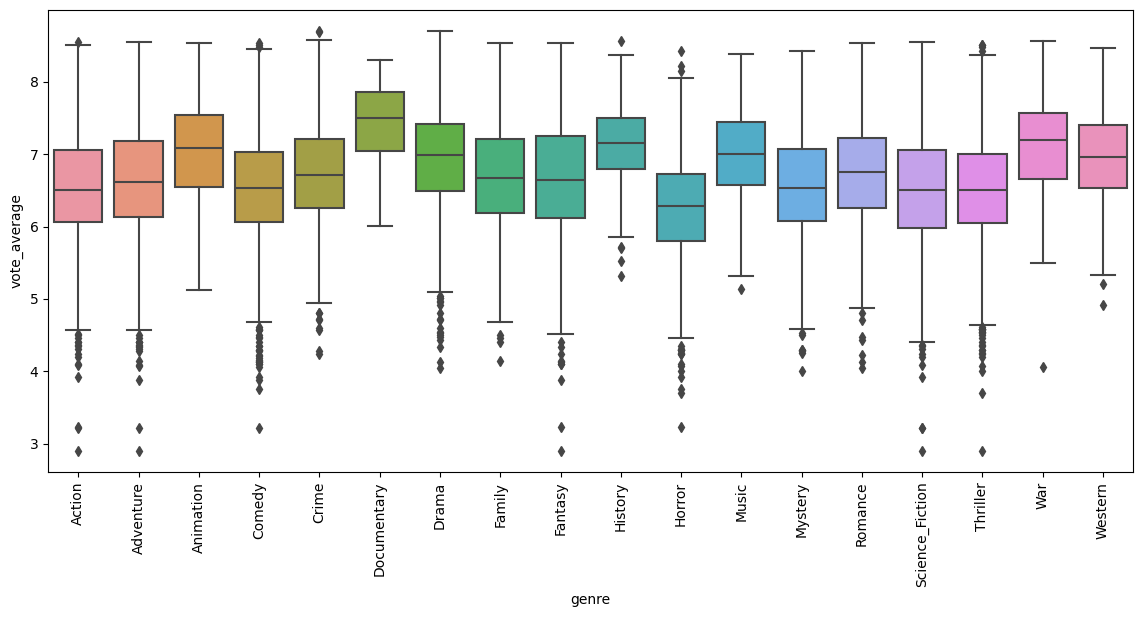

In [7]:
_ = plt.subplots(figsize=(14,6))
_ = sns.boxplot(data=long_format_df, x='genre', y='vote_average')
_ = plt.xticks(rotation=90)

In [8]:
movie_col = movie_data[['vote_average', 'year', 'month', 'budget',
       'revenue', 'runtime', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science_Fiction',
       'Thriller', 'War', 'Western']]
correlation = movie_col.corr()
correlation

,vote_average,year,month,budget,revenue,runtime,Action,Adventure,Animation,Comedy,...,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,Thriller,War,Western
vote_average,1.000000,-0.143040,0.115148,-0.016650,0.151533,0.359661,-0.109545,-0.034650,0.140606,-0.142174,...,-0.018736,0.135646,-0.224505,0.065377,-0.050941,0.035613,-0.088812,-0.144529,0.110343,0.040034
year,-0.143040,1.000000,-0.060405,0.245854,0.101311,-0.057633,0.031190,-0.019192,0.045183,-0.035248,...,0.024887,0.014413,0.020598,-0.003965,0.030807,-0.013667,-0.004356,0.042913,-0.046551,-0.091309
month,0.115148,-0.060405,1.000000,0.024120,0.025405,0.131065,-0.078904,-0.012389,0.016807,-0.023406,...,0.017481,0.059661,-0.025330,0.017242,-0.024159,-0.010392,-0.038835,-0.055229,0.038667,0.027207
budget,-0.016650,0.245854,0.024120,1.000000,0.710059,0.282480,0.325937,0.425717,0.180428,-0.047710,...,0.209660,-0.000429,-0.189633,-0.033455,-0.064984,-0.102888,0.221999,-0.071026,0.001059,-0.008785
revenue,0.151533,0.101311,0.025405,0.710059,1.000000,0.257408,0.208085,0.348251,0.157552,-0.015624,...,0.138306,-0.043719,-0.120373,-0.004408,-0.065655,-0.053397,0.162293,-0.084912,-0.026583,-0.025178
runtime,0.359661,-0.057633,0.131065,0.282480,0.257408,1.000000,0.090280,0.058074,-0.268312,-0.246349,...,-0.035760,0.262741,-0.180727,0.003112,0.002265,0.027193,0.000349,0.006883,0.168915,0.075234
Action,-0.109545,0.031190,-0.078904,0.325937,0.208085,0.090280,1.000000,0.301358,-0.019620,-0.182767,...,0.029796,-0.022485,-0.132276,-0.082241,-0.102383,-0.212887,0.257574,0.182009,0.047721,0.022276
Adventure,-0.034650,-0.019192,-0.012389,0.425717,0.348251,0.058074,0.301358,1.000000,0.256813,-0.022664,...,0.255223,-0.024664,-0.161542,-0.045810,-0.106649,-0.130733,0.185549,-0.117938,0.000144,0.049437
Animation,0.140606,0.045183,0.016807,0.180428,0.157552,-0.268312,-0.019620,0.256813,1.000000,0.081164,...,0.217114,-0.061487,-0.105294,0.004354,-0.067966,-0.076066,0.039305,-0.177040,-0.033515,-0.021369
Comedy,-0.142174,-0.035248,-0.023406,-0.047710,-0.015624,-0.246349,-0.182767,-0.022664,0.081164,1.000000,...,0.024487,-0.139112,-0.182412,0.052219,-0.181902,0.170688,-0.155070,-0.387888,-0.094377,-0.029438


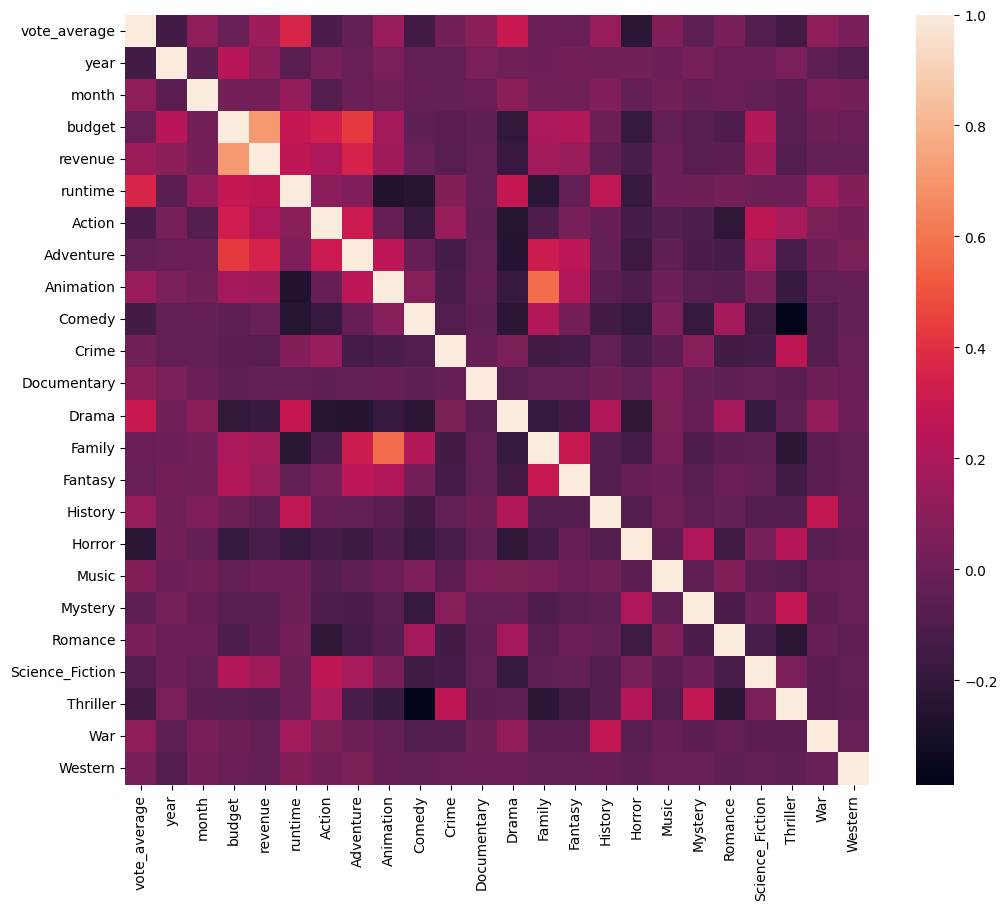

In [9]:
_ = plt.subplots(figsize=(12,10))
_ = sns.heatmap(correlation)

In [10]:
correlation.vote_average.sort_values(ascending=False)

vote_average       1.000000
runtime            0.359661
Drama              0.299878
revenue            0.151533
Animation          0.140606
History            0.135646
month              0.115148
War                0.110343
Documentary        0.092084
Music              0.065377
Western            0.040034
Romance            0.035613
Crime              0.023401
Family            -0.006933
budget            -0.016650
Fantasy           -0.018736
Adventure         -0.034650
Mystery           -0.050941
Science_Fiction   -0.088812
Action            -0.109545
Comedy            -0.142174
year              -0.143040
Thriller          -0.144529
Horror            -0.224505
Name: vote_average, dtype: float64

The two most significant predictive factors for average ratings are a film's runtime and whether it is a drama.

In [11]:
movie_data.vote_average.describe()

count    6421.000000
mean        6.677907
std         0.765570
min         2.899000
25%         6.178000
50%         6.687000
75%         7.239000
max         8.704000
Name: vote_average, dtype: float64

In [12]:
movie_data.runtime.describe()

count    6421.000000
mean      108.751596
std        19.729506
min        61.000000
25%        95.000000
50%       105.000000
75%       119.000000
max       316.000000
Name: runtime, dtype: float64

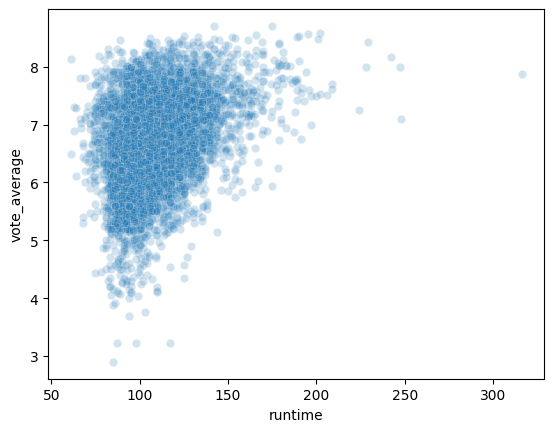

In [13]:
_ = sns.scatterplot(data=movie_data, x='runtime', y='vote_average', alpha=0.2)

In [14]:
quintiles = pd.qcut(movie_data['runtime'], 5)
movie_data.groupby(quintiles)['vote_average'].describe()

,count,mean,std,min,25%,50%,75%,max
runtime,,,,,,,,
"(60.999, 93.0]",1347.0,6.363144,0.797203,2.899,5.8585,6.355,6.9095,8.462
"(93.0, 101.0]",1261.0,6.475518,0.744034,3.234,6.0000,6.462,6.9860,8.248
"(101.0, 110.0]",1321.0,6.621940,0.708623,3.759,6.1780,6.600,7.1170,8.496
"(110.0, 123.0]",1281.0,6.831271,0.658962,3.222,6.3960,6.850,7.3000,8.453
"(123.0, 316.0]",1211.0,7.137584,0.652959,4.344,6.7010,7.174,7.5800,8.704


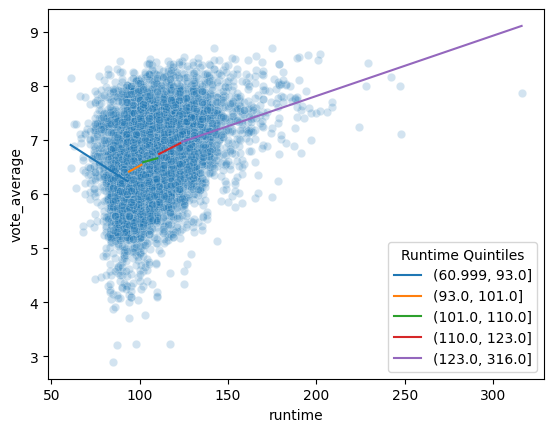

In [36]:
# Create the scatter plot
sns.scatterplot(data=movie_data, x='runtime', y='vote_average', alpha=0.2)

# Calculate quintiles
quintiles = pd.qcut(movie_data['runtime'], 5)

# Fit a regression model and plot trend lines for each quintile
for quintile, group in movie_data.groupby(quintiles):
    X = sm.add_constant(group['runtime'])
    y = group['vote_average']
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    intercept, slope = model.params
    
    # Get the range of the current quintile
    x_min, x_max = group['runtime'].min(), group['runtime'].max()
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = intercept + slope * x_vals
    
    # Plot the best-fit line
    plt.plot(x_vals, y_vals, label=f'{quintile}')

# Add legend
plt.legend(title='Runtime Quintiles')
plt.show()

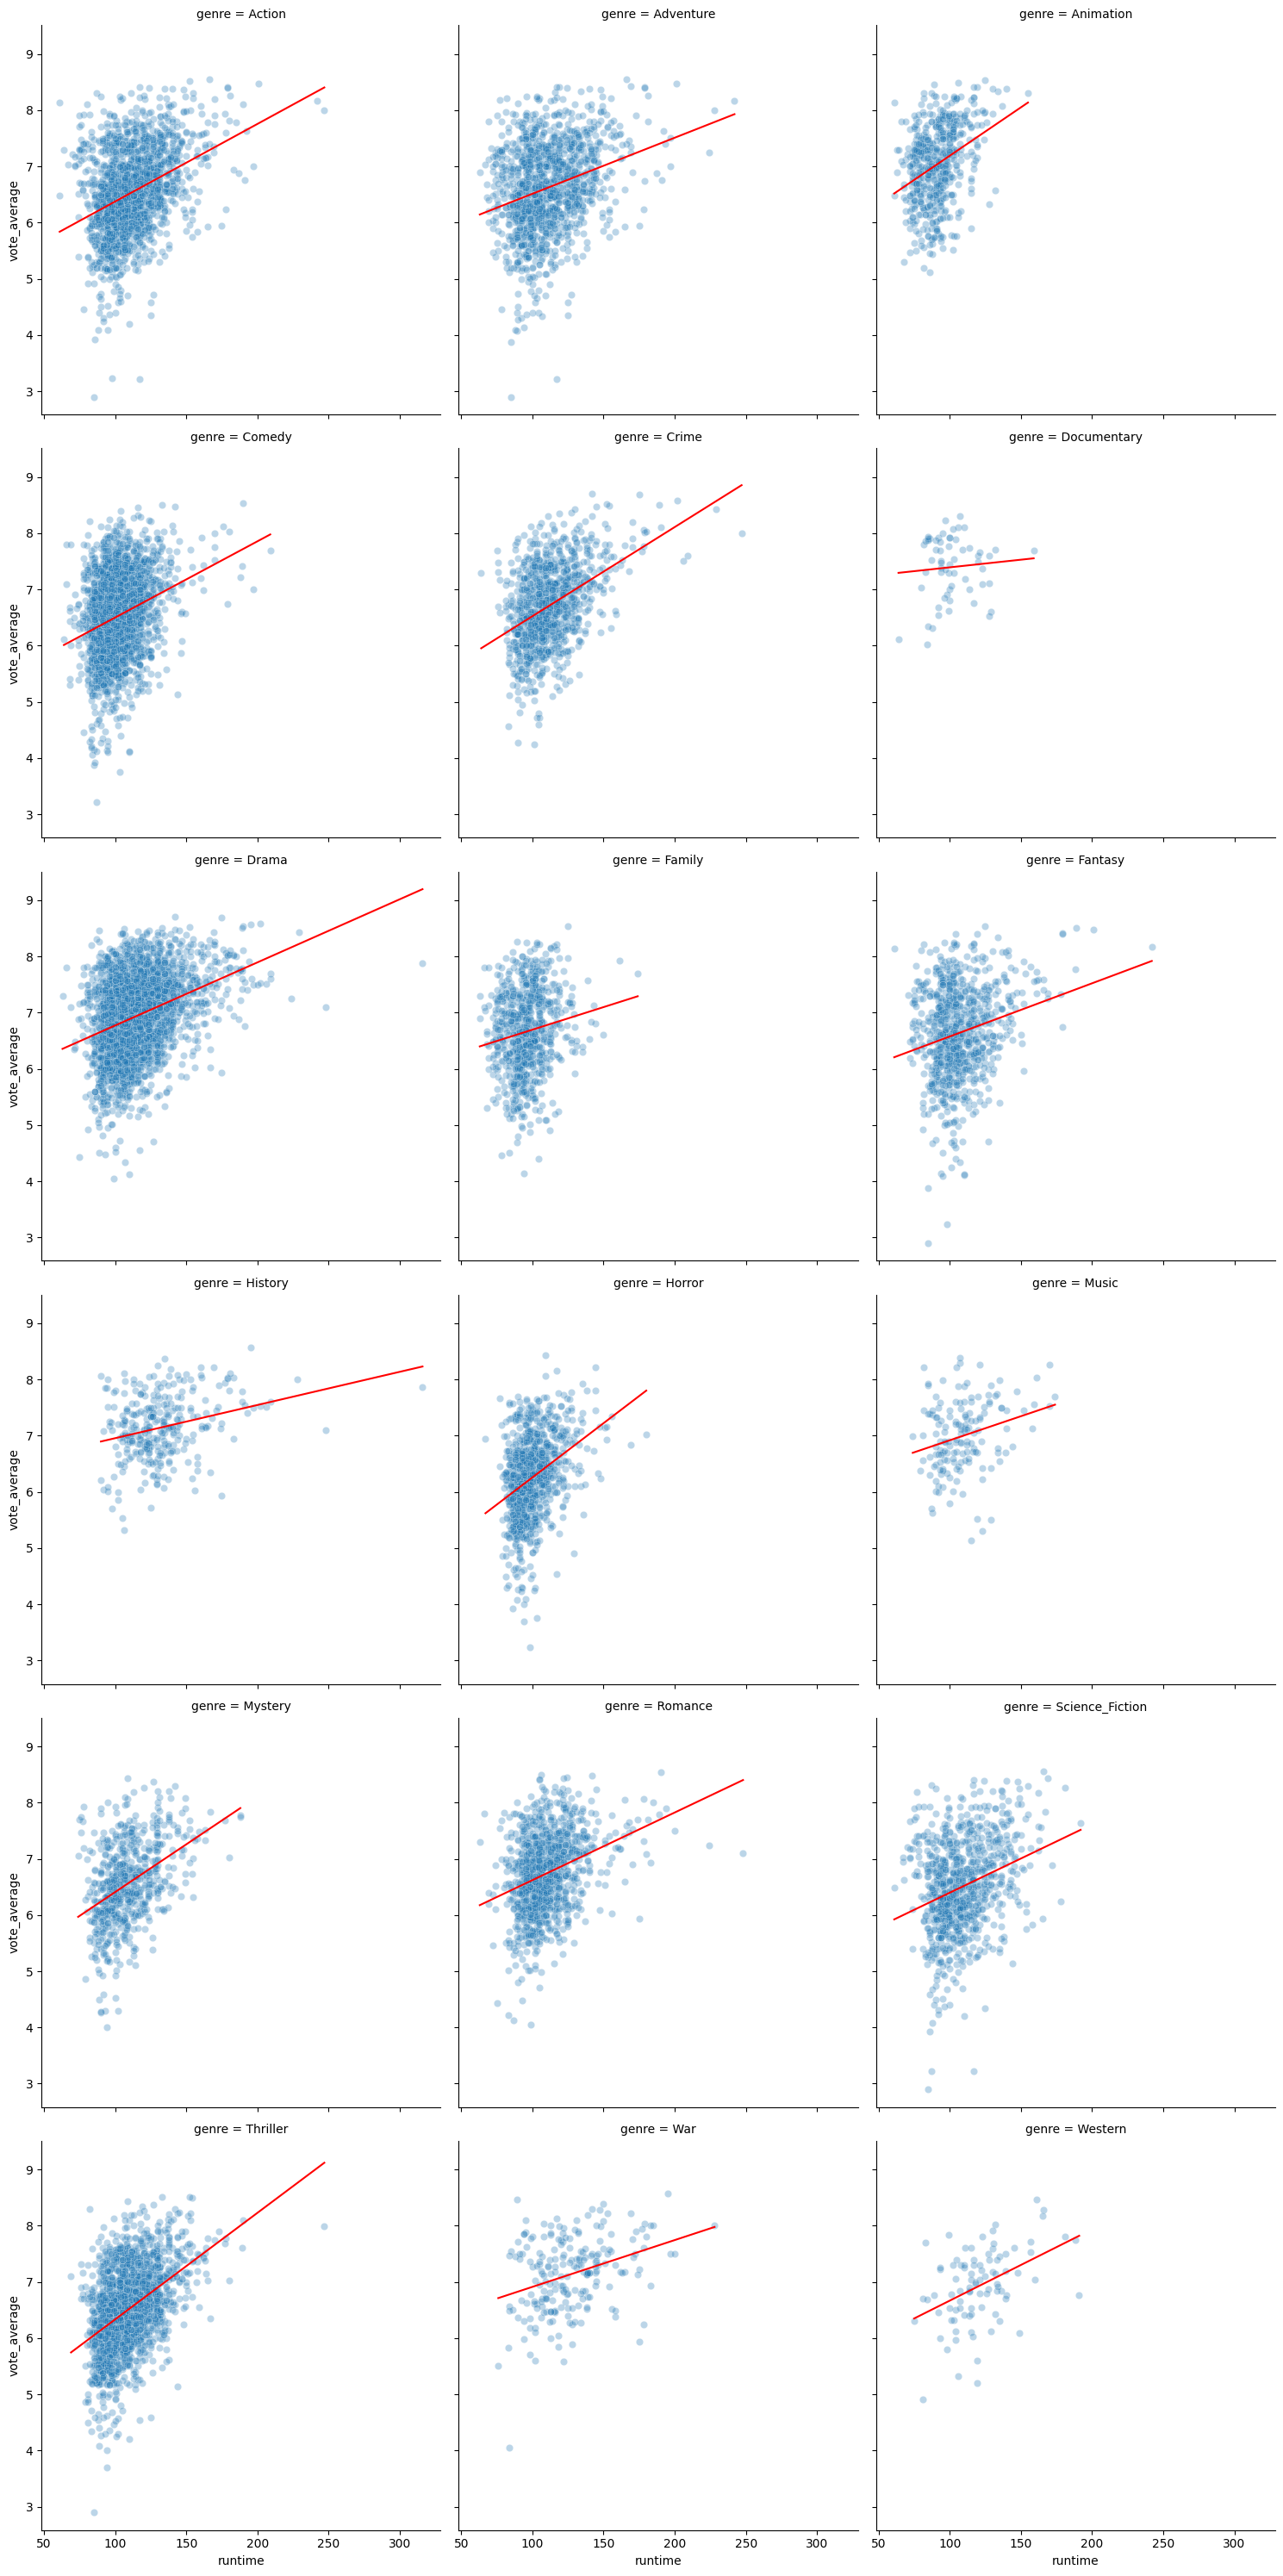

In [38]:
g = sns.relplot(data=long_format_df, x='runtime', y='vote_average', alpha=0.3, col='genre', col_wrap=3)

for ax in g.axes.flat:
    title = ax.get_title()
    genre = title.split(' = ')[1]
    genre_data = long_format_df[long_format_df['genre'] == genre]
    
    # Fit a regression model
    X = sm.add_constant(genre_data['runtime'])
    y = genre_data['vote_average']
    model = sm.OLS(y, X).fit()
    intercept, slope = model.params
    
    # Generate x-values for the trend line
    x_vals = np.linspace(genre_data['runtime'].min(), genre_data['runtime'].max(), 100)
    y_vals = intercept + slope * x_vals
    
    # Plot the trend line on the current subplot
    ax.plot(x_vals, y_vals, color='red')
    
plt.show()

Across genres, there is a notable positive correlation between runtime and ratings. This seems to be more an effect of very short movies getting consistently poor ratings, rather than long runtimes leading to high ratings. This dataset excluded any records with 60 or fewer minutes of runtime, which mostly consisted of works such as television specials, music videos, and direct-to-video children's animation, which were all outside the desired scope of this project. Was this the correct cutoff? Looking at the (blue) trendline for the quintile of shortest films, it is still obviously quite different than the others.

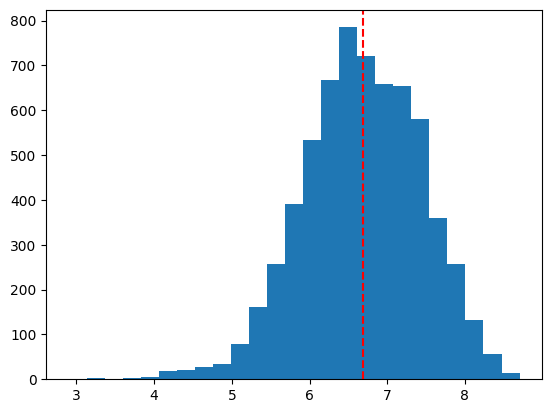

In [47]:
average_rating = np.median(movie_data.vote_average)
_ = plt.hist(movie_data.vote_average, bins=25)
_ = plt.axvline(x=average_rating, color='r', linestyle='--')

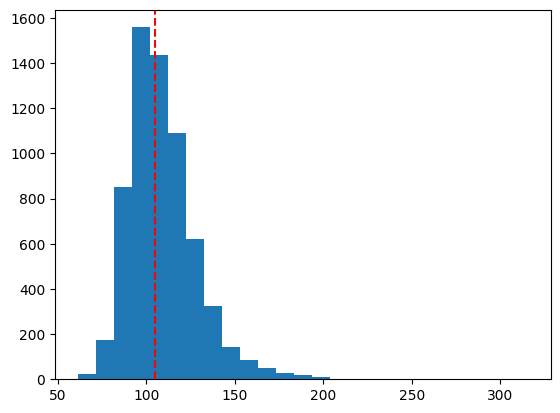

In [46]:
average_runtime = np.median(movie_data.runtime)
_ = plt.hist(movie_data.runtime, bins=25)
_ = plt.axvline(x=average_runtime, color='r', linestyle='--')

In [39]:
long_run = movie_data.sort_values(by='runtime', ascending=False).head(50)
long_run

,Unnamed: 0,id,title,vote_average,year,month,genre_ids,budget,revenue,runtime,...,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,Thriller,War,Western
250,250,3870,1900,7.872,1976,8,"[18, 36]",9000000.0,NaN,316,...,0,1,0,0,0,0,0,0,0,0
40,40,8095,Cleopatra,7.100,1963,6,"[18, 36, 10749]",44000000.0,7.100000e+07,248,...,0,1,0,0,0,1,0,0,0,0
3526,3526,414419,Kill Bill: The Whole Bloody Affair,7.994,2011,3,"[28, 80, 53]",55000000.0,NaN,247,...,0,0,0,0,0,0,0,1,0,0
5925,5925,791373,Zack Snyder's Justice League,8.169,2021,3,"[28, 12, 14]",70000000.0,NaN,242,...,1,0,0,0,0,0,0,0,0,0
453,453,311,Once Upon a Time in America,8.424,1984,5,"[18, 80]",30000000.0,5.500000e+06,229,...,0,0,0,0,0,0,0,0,0,0
23,23,947,Lawrence of Arabia,7.999,1962,12,"[12, 36, 10752]",15000000.0,6.999538e+07,228,...,0,1,0,0,0,0,0,0,1,0
1763,1763,19666,Lagaan: Once Upon a Time in India,7.244,2001,6,"[12, 10749, 18]",5200000.0,8.100000e+06,224,...,0,0,0,0,0,1,0,0,0,0
1734,1734,10757,Kabhi Khushi Kabhie Gham,7.700,2001,12,"[35, 18]",NaN,NaN,209,...,0,0,0,0,0,0,0,0,0,0
5559,5559,398978,The Irishman,7.608,2019,11,"[80, 18, 36]",159000000.0,9.688530e+05,209,...,0,1,0,0,0,0,0,0,0,0
6315,6315,466420,Killers of the Flower Moon,7.511,2023,10,"[80, 36, 18]",200000000.0,1.568000e+08,206,...,0,1,0,0,0,0,0,0,0,0


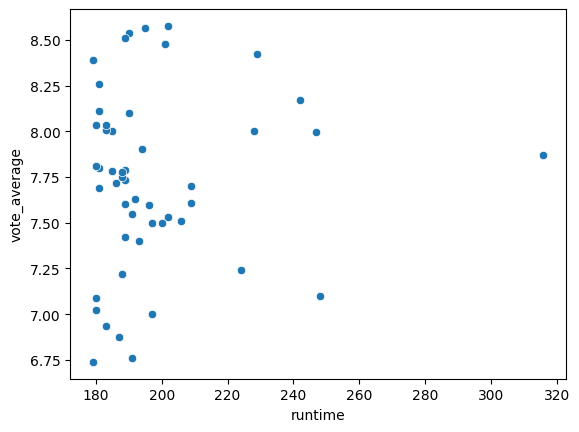

In [40]:
_ = sns.scatterplot(long_run, x='runtime', y='vote_average')

Looking at the longest movies in the dataset, it is apparent that there are no outliers with very long runtimes and very high ratings. Almost every film over 200 minutes is below the trendline.

### Are dramas more popular?

In [20]:
drama_rating = movie_data.loc[movie_data.Drama == 1].vote_average
not_drama_rating = movie_data.loc[movie_data.Drama != 1].vote_average

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

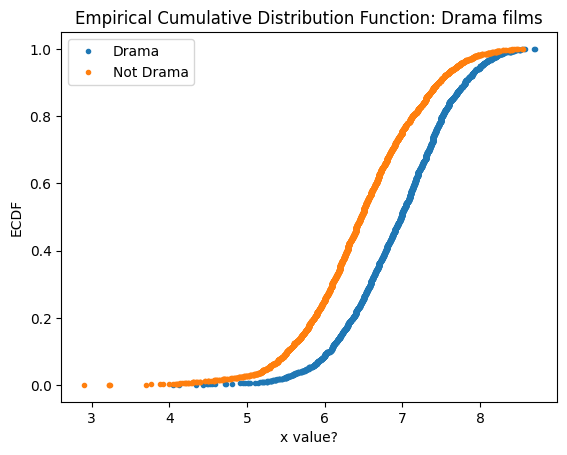

In [22]:
# Compute ECDF for drama data: x_drama, y_drama
x_drama, y_drama = ecdf(drama_rating)
x_not_drama, y_not_drama = ecdf(not_drama_rating)

# Generate plot
_ = plt.plot(x_drama, y_drama, marker='.', linestyle='none')
_ = plt.plot(x_not_drama, y_not_drama, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('x value?')
_ = plt.ylabel('ECDF')
_ = plt.legend(['Drama','Not Drama'])
_ = plt.title('Empirical Cumulative Distribution Function: Drama films')

# Display the plot
plt.show()

#### Visually, it seems clear that dramatic films are rated more highly than other films.
We can also demonstrate this through null hypothesis significance testing.

Null hypothesis: There is no difference in ratings beween dramas and non-dramatic films.

In [23]:
all_rating = np.concatenate((drama_rating, not_drama_rating))
mean_replicates = []

for i in range(10000):
    rand_rating = np.random.permutation(all_rating)
    rand_drama = rand_rating[:len(drama_rating)]
    # rand_not_drama = rand_rating[len(drama_rating):]
    mean_replicates.append(np.mean(rand_drama))

In [24]:
np.mean(mean_replicates)

6.6779277295430015

In [25]:
drama_mean = np.mean(drama_rating)
drama_mean

6.940704569989205

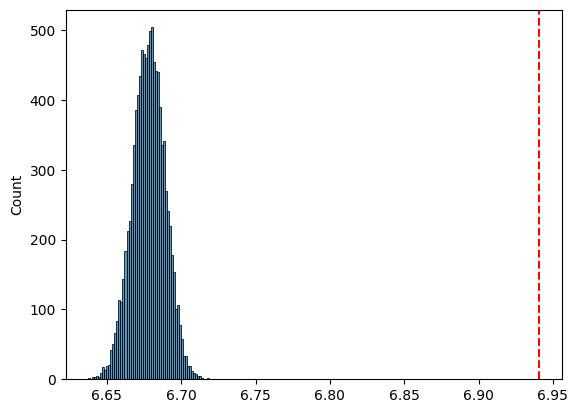

In [26]:
_ = sns.histplot(mean_replicates)
_ = plt.axvline(x=drama_mean, color='r', linestyle='--')

In [27]:
mean_replicates_array = np.array(mean_replicates)
count_greater_than_drama_mean = np.sum(mean_replicates_array > drama_mean)

print(count_greater_than_drama_mean)

0


After taking 10000 permutations of the data, none of the replicates had average ratings anywhere close to the average rating of drama films. We have therefore shown visually and computationally that drama films are rated more highly than the average of all films in the dataset, with a very small p-value.